In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle

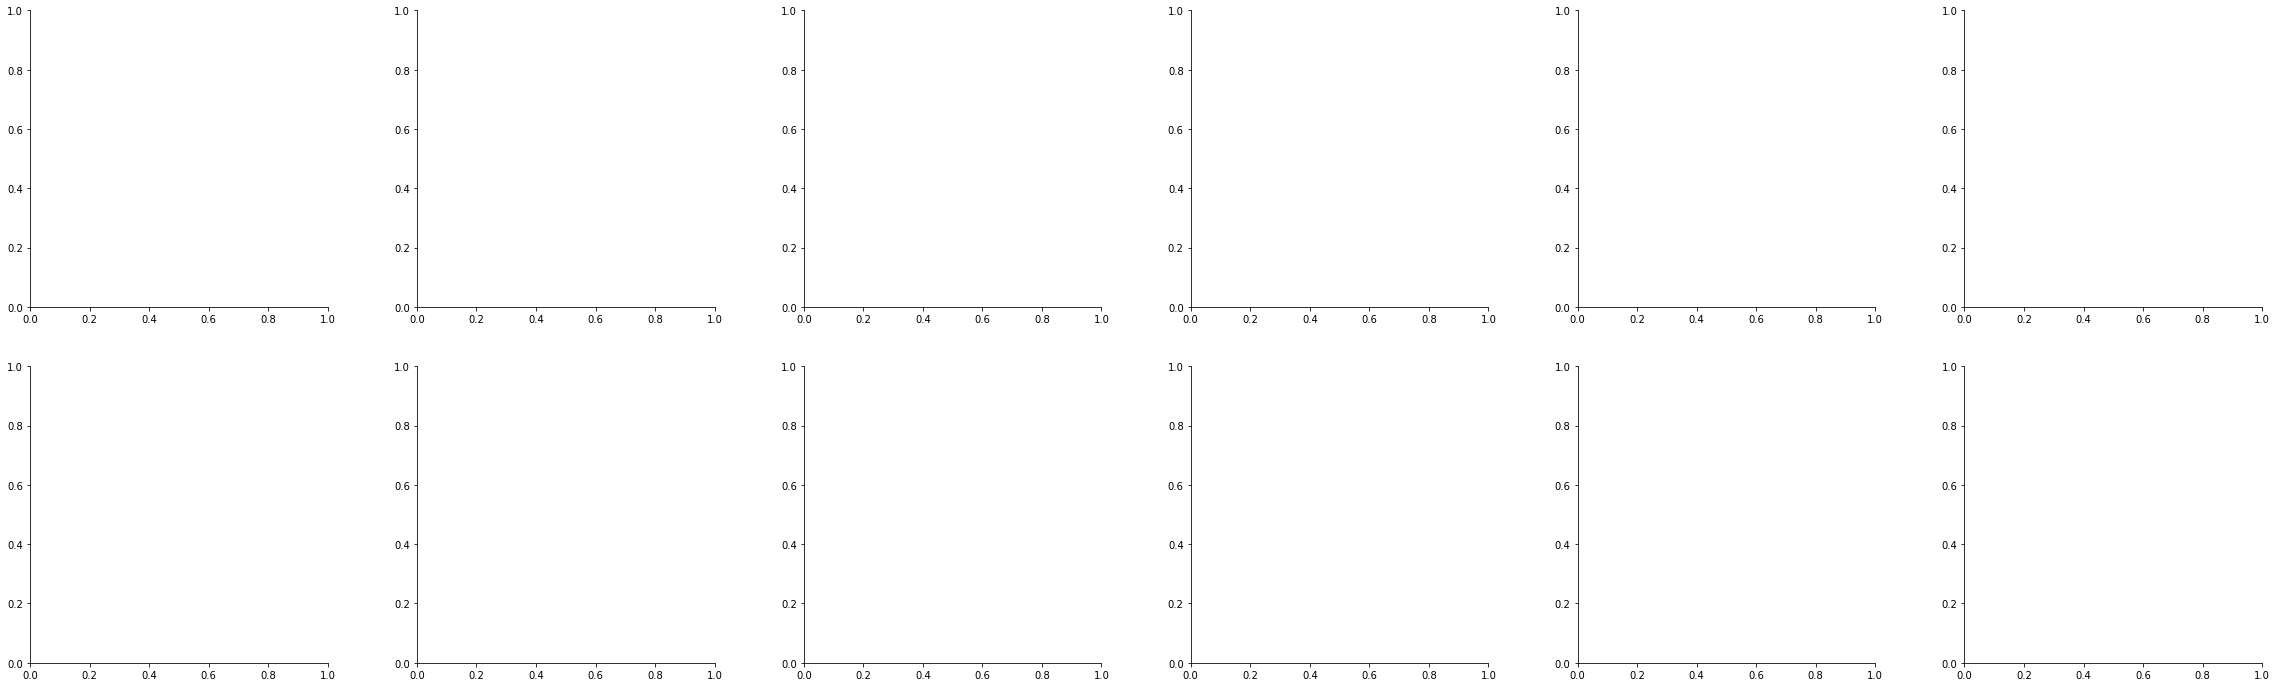

In [9]:
fig, axs = plt.subplots(2, 6, figsize=(40, 12), gridspec_kw={'hspace': 0.2, 'wspace': 0.3})
palette = sns.color_palette('Greys', n_colors=2)
plt.rcParams.update({'font.size': 10})
sns.despine(top=True, right=True)

def avg(lst):
    return sum(lst)/len(lst)
    
def create_legend():
    for ax in axs.flat:
        ax.legend([],[], frameon=False)
    lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    fig.legend(lines, labels)

def myplot(kind, axs, title):
    if kind == "lat":
        plot_latency(axs, title)
    if kind == "cpu":
        plot_cpu(axs, title)
    if kind == "goodput":
        plot_goodput(axs, title)
    if kind == "cpg":
        plot_cpu_per_goodput(axs, title)

def plot_latency(axs, title):
    results = []
    for e in pq_100:
      results.append([e, "parquet", "100"])
    for e in pq_10:
      results.append([e, "parquet", "10"])
    for e in pq_1:
      results.append([e, "parquet", "1"])
    for e in rpq_100:
      results.append([e, 'rados-parquet', "100"])
    for e in rpq_10:
      results.append([e, 'rados-parquet', "10"])
    for e in rpq_1:
      results.append([e, 'rados-parquet', "1"])
    df = pd.DataFrame(np.array(results), columns=['Duration (s)', 'File Format', 'Selectivity (%)'])
    df[['Duration (s)']] = df[['Duration (s)']].apply(pd.to_numeric)
    sns_plot = sns.barplot(x="Selectivity (%)", y="Duration (s)", hue="File Format", data=df, ci='sd', capsize=.15, errwidth=0.5, ax=axs, palette=palette)
    sns_plot.set(ylim=(0, 300))
    sns_plot.set_title(title, fontdict= { 'fontsize': 10})
    sns_plot.set_xlabel('Selectivity (%)', fontsize=10)
    sns_plot.set_ylabel('Duration (s)', fontsize=10)
    fig.savefig('latency_optimized.png', dpi=600)


def plot_cpu(axs, title):
    results = []
    for e in cpu_pq_100:
      results.append([e, "parquet", "100"])
    for e in cpu_pq_10:
      results.append([e, "parquet", "10"])
    for e in cpu_pq_1:
      results.append([e, "parquet", "1"])
    for e in cpu_rpq_100:
      results.append([e, 'rados-parquet', "100"])
    for e in cpu_rpq_10:
      results.append([e, 'rados-parquet', "10"])
    for e in cpu_rpq_1:
      results.append([e, 'rados-parquet', "1"])
    df = pd.DataFrame(np.array(results), columns=['CPU Usage (%)', 'File Format', 'Selectivity (%)'])
    df[['CPU Usage (%)']] = df[['CPU Usage (%)']].apply(pd.to_numeric)
    sns_plot = sns.barplot(x="Selectivity (%)", y="CPU Usage (%)", hue="File Format", data=df, ax=axs, ci='sd', capsize=.15, errwidth=0.5, palette=palette)
    sns_plot.set(ylim=(0, 350000))
    sns_plot.set_title(title, fontdict= { 'fontsize': 10})
    sns_plot.set_xlabel('Selectivity (%)', fontsize=10)
    sns_plot.set_ylabel('CPU Usage', fontsize=10)
    fig.savefig('cpu.png', dpi=600)


def plot_goodput(axs, title):
    results = []
    for e in pq_100:
      results.append([(154.8/e)*1000, "parquet", "100"])
    for e in pq_10:
      results.append([(15.48/e)*1000, "parquet", "10"])
    for e in pq_1:
      results.append([(1.548/e)*1000, "parquet", "1"])
    for e in rpq_100:
      results.append([(154.8/e)*1000, 'rados-parquet', "100"])
    for e in rpq_10:
      results.append([(15.48/e)*1000, 'rados-parquet', "10"])
    for e in rpq_1:
      results.append([(1.548/e)*1000, 'rados-parquet', "1"])
    df = pd.DataFrame(np.array(results), columns=['Goodput (MB/s)', 'File Format', 'Selectivity (%)'])
    df[['Goodput (MB/s)']] = df[['Goodput (MB/s)']].apply(pd.to_numeric)
    sns_plot = sns.barplot(x="Selectivity (%)", y="Goodput (MB/s)", hue="File Format", ci='sd', capsize=.15, errwidth=0.5, data=df, ax=axs, palette=palette)
    sns_plot.set(ylim=(0, 1000))
    sns_plot.set_xlabel('Selectivity (%)', fontsize=10)
    sns_plot.set_ylabel('Goodput (MB/s)', fontsize=10)
    sns_plot.set_title(title, fontdict= { 'fontsize': 10})
    fig.savefig('goodput.png', dpi=600)


def plot_cpu_per_goodput(axs, title):
    results = []
    for e in pq_100:
      results.append([ avg(cpu_pq_100)/((154.8/e)*1000) , "parquet", "100"])
    for e in pq_10:
      results.append([ avg(cpu_pq_10)/((15.48/e)*1000) , "parquet", "10"])
    for e in pq_1:
      results.append([ avg(cpu_pq_1)/((1.548/e)*1000) , "parquet", "1"])
    for e in rpq_100:
      results.append([ avg(cpu_rpq_100)/((154.8/e)*1000) , 'rados-parquet', "100"])
    for e in rpq_10:
      results.append([ avg(cpu_rpq_10)/((15.48/e)*1000) , 'rados-parquet', "10"])
    for e in rpq_1:
      results.append([ avg(cpu_rpq_1)/((1.548/e)*1000) , 'rados-parquet', "1"])
    df = pd.DataFrame(np.array(results), columns=['CPU/Goodput', 'File Format', 'Selectivity (%)'])
    df[['CPU/Goodput']] = df[['CPU/Goodput']].apply(pd.to_numeric)
    sns_plot = sns.barplot(x="Selectivity (%)", y="CPU/Goodput", hue="File Format", data=df, ci='sd', capsize=.15, errwidth=0.5, ax=axs, palette=palette)
    sns_plot.set(ylim=(0, 40000))
    sns_plot.set_title(title, fontdict= { 'fontsize': 10})
    sns_plot.set_xlabel('Selectivity (%)', fontsize=10)
    sns_plot.set_ylabel('CPU/Goodput', fontsize=10)
    fig.savefig('cpu_per_goodput.png', dpi=600)

In [10]:
kind = "lat"

In [11]:
# with parallel column reads

pq_100 =  [167.8912649154663]
pq_10 =  [169.3760986328125]
pq_1 =  [164.15802764892578]

rpq_100 =  [179.5517349243164, 181.68437314033508, 181.12016129493713]
rpq_10 =  [100.9444830417633, 99.89692258834839]
rpq_1 =  [91.90846180915833, 91.715891122818, 95.96757364273071]

myplot(kind, axs[0,0], "parallel column reads")

# with compressed ipc

pq_100 =  [169.31381392478943]
pq_10 =  [173.97771668434143]
pq_1 =  [169.28874731063843]

rpq_100 =  [174.17989826202393] 
rpq_10 =  [141.7854504585266]
rpq_1 =  [138.37220549583435]

myplot(kind, axs[0,1], "compressed ipc")

# with parallel column reads and compressed ipc

rpq_100 =  [114.18088865280151]
rpq_10 =  [99.59617829322815]
rpq_1 =  [91.26423788070679]

pq_100 =  [167.8912649154663]
pq_10 =  [169.3760986328125]
pq_1 =  [164.15802764892578]

myplot(kind, axs[0,2], "with parallel column reads and compressed ipc")